In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# input the stock ticker we wana study
stock_ticker = "TSLA"
current_date = '2025-03-28'
maturity_date = '2025-04-17'
option_type = 'call'

In [ ]:
# read option chain file
df = pd.read_excel('Combined_' + stock_ticker + '_options_15-Apr-25.xlsx')

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11199 entries, 0 to 11198
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ticker                    11199 non-null  object 
 1   Symbol                    11199 non-null  object 
 2   Expiration Date           11199 non-null  object 
 3   Strike                    11199 non-null  float64
 4   Bid                       11199 non-null  float64
 5   Ask                       11199 non-null  float64
 6   Last                      11199 non-null  float64
 7   IVM                       11199 non-null  float64
 8   Direction                 11199 non-null  object 
 9   Current Date              11199 non-null  object 
 10  Current Date Stock Price  11199 non-null  float64
dtypes: float64(6), object(5)
memory usage: 962.5+ KB


In [5]:
#show unique values in Expiration Date
df['Expiration Date'].unique()


array(['17-Apr-2025', '25-Apr-2025', '16-May-2025', '21-Mar-2025',
       '21-Feb-2025', '17-Jan-2025'], dtype=object)

In [6]:
# if IVM=0, filter out
df=df[df['IVM']!=0]

In [ ]:
# Add columns for regression

# Ensure 'Expiration Date' and 'Current Date' are in datetime format
df['Expiration Date'] = pd.to_datetime(df['Expiration Date'])
df['Current Date'] = pd.to_datetime(df['Current Date'])

# Add moneyness
df['moneyness'] = df['Current Date Stock Price'] / df['Strike']

# Add days to expiration
df['time_to_maturity_days'] = (df['Expiration Date'] - df['Current Date']).dt.days

# Add 'days_to_expiration' in years
df['time_to_maturity_years'] = df['time_to_maturity_days'] / 365

# Add a column 'moneyness square'
df['moneyness_square'] = df['moneyness'] ** 2

# Add a column 'maturity_square'
df['maturity_square'] = df['time_to_maturity_years'] ** 2

df['moneyness_maturity']= df['moneyness'] * df['time_to_maturity_years']

df['ln_IVM'] = np.log(df['IVM'])

col_order = ['Ticker', 'Symbol', 'Current Date', 'Expiration Date', 'time_to_maturity_days', 'time_to_maturity_years', 'Current Date Stock Price', 'Strike', 'Bid', 'Ask', 'Last',
       'IVM', 'Direction', 'moneyness', 'moneyness_square', 'maturity_square', 'moneyness_maturity', 'ln_IVM']
df = df.loc[:, col_order]
df

,Ticker,Symbol,Expiration Date,Strike,Bid,Ask,Last,IVM,Direction,Current Date,Current Date Stock Price,moneyness,days_to_expiration,days_to_expiration(in years),underlying_stock,moneyness_square,maturity_square,moneyness_maturity,log_IVM
1,TSLA 4/17/25 P207.5,TSLA,2025-04-17,207.5,0.120000,0.140000,0.120000,1.051476,put,2025-04-15,254.110001,1.224627,2,0.005479,TSLA,1.499710,0.000030,0.006710,0.050195
2,TSLA 4/17/25 P262.5,TSLA,2025-04-17,262.5,11.400000,11.600000,10.700000,0.626457,put,2025-04-15,254.110001,0.968038,2,0.005479,TSLA,0.937098,0.000030,0.005304,-0.467675
3,TSLA 4/17/25 P265,TSLA,2025-04-17,265.0,13.350000,13.600000,12.480000,0.632224,put,2025-04-15,254.110001,0.958906,2,0.005479,TSLA,0.919500,0.000030,0.005254,-0.458512
4,TSLA 4/17/25 P267.5,TSLA,2025-04-17,267.5,15.450000,15.700000,14.600000,0.640779,put,2025-04-15,254.110001,0.949944,2,0.005479,TSLA,0.902393,0.000030,0.005205,-0.445071
5,TSLA 4/17/25 P270,TSLA,2025-04-17,270.0,17.550003,17.899994,16.750000,0.641986,put,2025-04-15,254.110001,0.941148,2,0.005479,TSLA,0.885760,0.000030,0.005157,-0.443189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11194,TSLA 2/21/25 C350,TSLA,2025-02-21,350.0,52.250000,53.050003,51.750000,0.632056,call,2025-01-02,379.279999,1.083657,50,0.136986,TSLA,1.174313,0.018765,0.148446,-0.458777
11195,TSLA 2/21/25 C355,TSLA,2025-02-21,355.0,49.250000,49.949997,49.800003,0.630300,call,2025-01-02,379.279999,1.068394,50,0.136986,TSLA,1.141467,0.018765,0.146355,-0.461560
11196,TSLA 2/21/25 C360,TSLA,2025-02-21,360.0,46.400009,47.150009,46.199997,0.630705,call,2025-01-02,379.279999,1.053556,50,0.136986,TSLA,1.109979,0.018765,0.144323,-0.460917
11197,TSLA 2/21/25 C365,TSLA,2025-02-21,365.0,43.750000,44.199997,43.800003,0.629345,call,2025-01-02,379.279999,1.039123,50,0.136986,TSLA,1.079777,0.018765,0.142346,-0.463076


In [8]:
#function to get option chain in the dataframe
# select option chain with specific current date and maturity date
def get_option_chain(df,underlying_stock, direction,current_date,maturity_date):
    df_res = df[(df['underlying_stock'] == underlying_stock) & (df['Direction'] == direction) & (df['Current Date'] == current_date) & (df['Expiration Date'] == maturity_date)]
    return df_res

In [9]:
# #function to perform linear regression with list of columns as input, using sm.OLS
# import statsmodels.api as sm
# def linear_regression(df, y_col, x_cols):
#     X = df[x_cols]
#     y = df[y_col]
#     X = sm.add_constant(X)  # Adds a constant term to the predictor
#     model = sm.OLS(y, X).fit()
#     return model.summary()

#function to perform linear regression with list of columns as input, using sm.OLS
import statsmodels.api as sm
def linear_regression(df, y_col, x_cols):
    X = df[x_cols]
    y = df[y_col]
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(y, X).fit()
    return model

In [10]:
# Select the option chain for a specific stock, direction, and current date and maturity date
df_target = get_option_chain(df, stock_ticker, option_type ,current_date ,maturity_date )

# Define the dependent and independent variables
dependent_var = 'log_IVM'  # USE log IVM
independent_vars = ['moneyness', 'days_to_expiration(in years)', 'moneyness_square', 'maturity_square','moneyness_maturity'] # we set the regressor

# Perform linear regression
regression_summary = linear_regression(df_target, dependent_var, independent_vars).summary()

# Display the regression summary
print(regression_summary)

                            OLS Regression Results                            
Dep. Variable:                log_IVM   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     447.2
Date:                Fri, 18 Apr 2025   Prob (F-statistic):           1.21e-26
Time:                        13:24:06   Log-Likelihood:                 143.33
No. Observations:                  40   AIC:                            -280.7
Df Residuals:                      37   BIC:                            -275.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
moneyness       

In [11]:
print(df_new[['IVM']])

NameError: name 'df_new' is not defined

In [ ]:
# Function to get option chain in the dataframe (modified to exclude maturity date)

# Function to plot 3D graph of IVM across moneyness and days to expiration (in years)


def plot_ivm_across_moneyness_and_days(df, underlying_stock, direction, current_date):
    def get_option_chain(df, underlying_stock, direction, current_date):

        df_res = df[(df['underlying_stock'] == underlying_stock) & 
                    (df['Direction'] == direction) & 
                    (df['Current Date'] == current_date)]
        return df_res

    # Get the filtered option chain
    df_target = get_option_chain(df, underlying_stock, direction, current_date)
    
    # Create the 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df_target['moneyness'], 
               df_target['days_to_expiration(in years)'], 
               df_target['IVM'], 
               color='blue')
    
    # Set labels and title
    ax.set_xlabel('Moneyness')
    ax.set_ylabel('Days to Expiration (in years)')
    ax.set_zlabel('IVM')
    ax.set_title(f'IVM across Moneyness and Days to Expiration for {underlying_stock} {direction} options on {current_date}')
    
    # Show the plot
    plt.show()

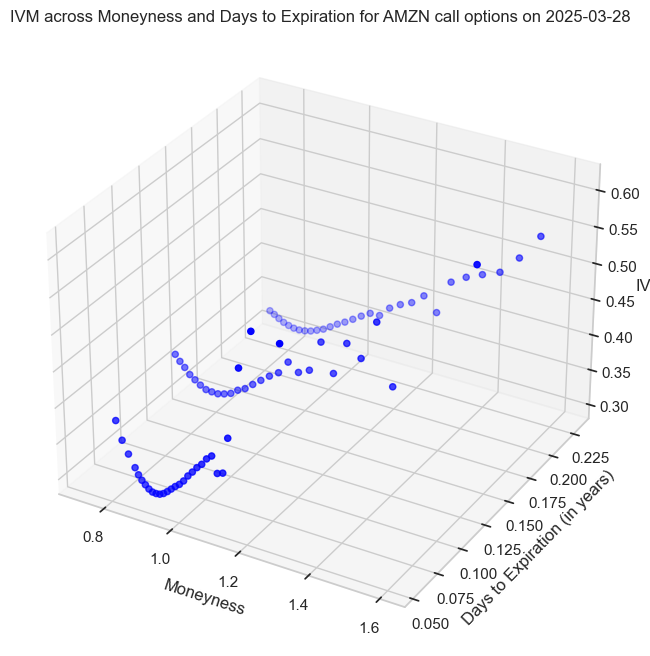

In [ ]:
plot_ivm_across_moneyness_and_days(df, stock_ticker, 'call', current_date)  #show call volatility smile

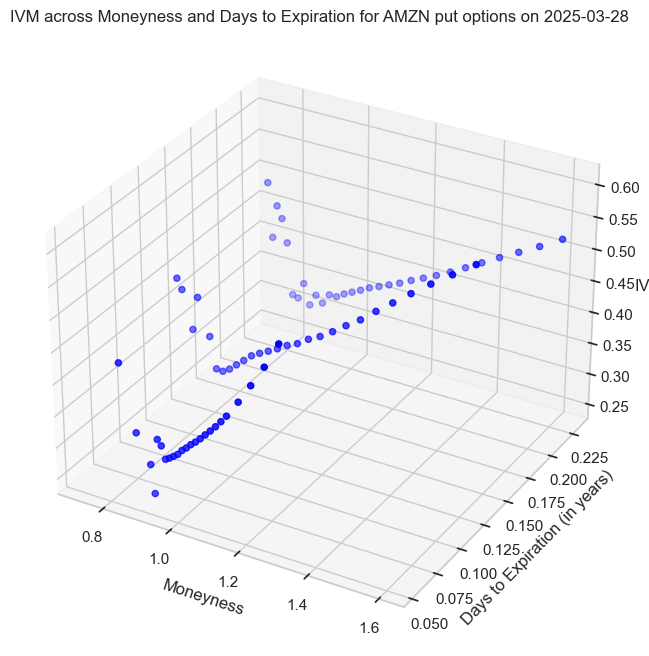

In [ ]:
plot_ivm_across_moneyness_and_days(df, stock_ticker, 'put', current_date)  # show put volatility smile

In [ ]:
# Define a function to plot the IVM across moneyness with maturity in the legend

def plot_ivm_across_moneyness(df, underlying_stock, direction, current_date):
    def get_option_chain(df, underlying_stock, direction, current_date):

        df_res = df[(df['underlying_stock'] == underlying_stock) & 
                    (df['Direction'] == direction) & 
                    (df['Current Date'] == current_date)]
        return df_res
    # Filter the data for the specified stock, direction, and date
    df_target = get_option_chain(df, underlying_stock, direction, current_date)
    
    # Group by maturity (days_to_expiration(in years))
    grouped = df_target.groupby('days_to_expiration(in years)')
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    for maturity, group in grouped:
        plt.scatter(group['moneyness'], group['IVM'], label=f'Maturity: {maturity:.2f} years')
    
    # Add labels, title, legend, and grid
    plt.xlabel('Moneyness')
    plt.ylabel('IVM')
    plt.title(f'IVM across Moneyness for {underlying_stock} {direction} options on {current_date}')
    plt.legend(title='Maturity (years)', loc='best')
    plt.grid()
    plt.show()

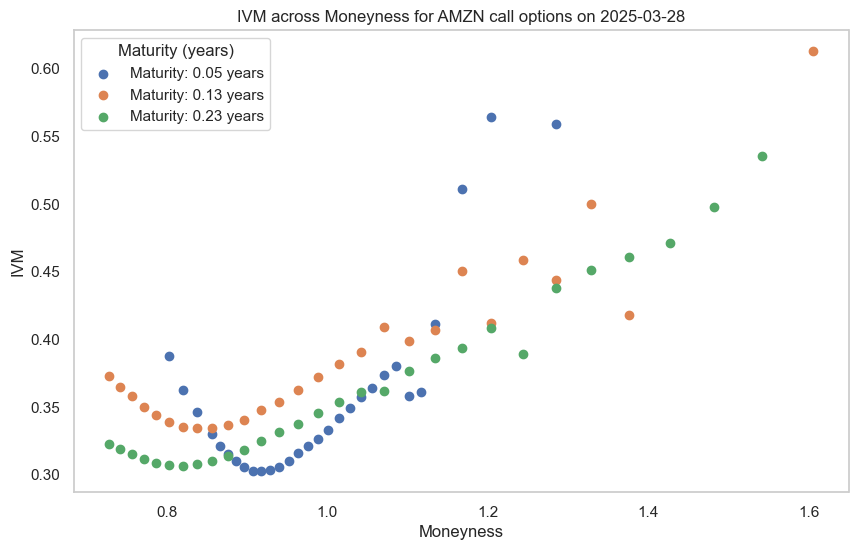

In [ ]:
plot_ivm_across_moneyness(df, stock_ticker, 'call', '2025-03-28')  # show call volatility smileb

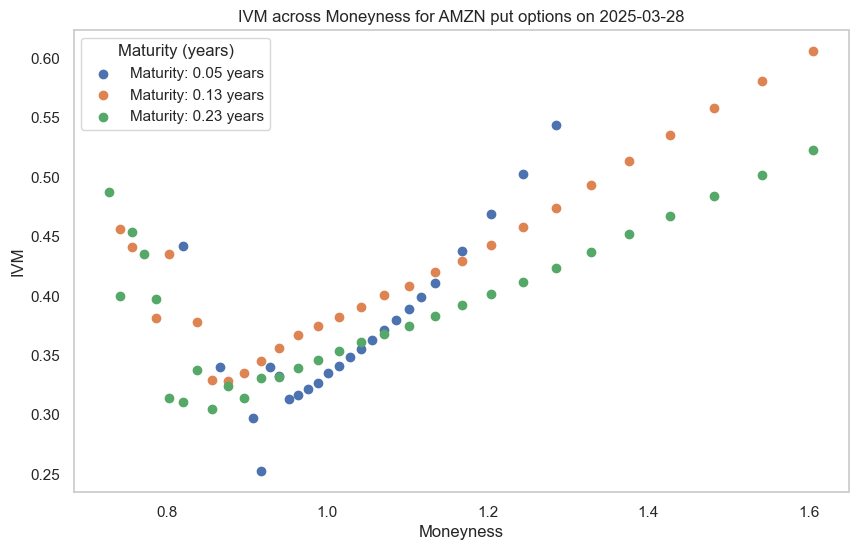

In [ ]:
plot_ivm_across_moneyness(df, stock_ticker, 'put', '2025-03-28')  # show put volatility smile

In [ ]:
# Function to input current stock price,strike, maturity date and direction, then output moneyess, days to expiration(in years),'moneyness_square', 'maturity_square', 'moneyness_maturity' in list
def get_warrant_moneyness_expiration(current_stock_price, strike, maturity_date, current_date,):
    # Convert dates to datetime format
    current_date = pd.to_datetime(current_date)
    maturity_date = pd.to_datetime(maturity_date)
    
    # Calculate moneyness and days to expiration
    moneyness = current_stock_price / strike
    days_to_expiration = (maturity_date - current_date).days
    days_to_expiration_in_years = days_to_expiration / 365
    
    # Calculate squares and products
    moneyness_square = moneyness ** 2
    maturity_square = days_to_expiration_in_years ** 2
    moneyness_maturity = moneyness * days_to_expiration_in_years
    
    return [moneyness, days_to_expiration_in_years, moneyness_square, maturity_square, moneyness_maturity]


In [ ]:
# we could define different regression model
# model1: K,T,K*T
# model2: K,T,K^2
# model3: K,T,T^2
# model4: K,T,K^2,K*T
# model5 K,T,T^2,K*T
# model6:K,T,K^2,T^2,K*T

In [ ]:
# Function to perform linear regression with list of columns as input, using sm.OLS
# model1: K,T,K*T
import statsmodels.api as sm

independent_vars_one = ['moneyness', 'days_to_expiration(in years)', 'moneyness_maturity'] # model1: K,T,K*T
model = linear_regression(df_target, dependent_var, independent_vars_one)


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_IVM   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     33.83
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           3.44e-06
Time:                        21:45:30   Log-Likelihood:                 22.422
No. Observations:                  29   AIC:                            -40.84
Df Residuals:                      27   BIC:                            -38.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
moneyness       

In [ ]:
# Function to perform linear regression with list of columns as input, using sm.OLS
# model2: K,T,K^2
import statsmodels.api as sm

independent_vars_two = ['moneyness', 'days_to_expiration(in years)', 'moneyness_square'] # model2: K,T,K^2
model = linear_regression(df_target, dependent_var, independent_vars_two)


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_IVM   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     78.74
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           9.29e-12
Time:                        21:45:30   Log-Likelihood:                 38.978
No. Observations:                  29   AIC:                            -71.96
Df Residuals:                      26   BIC:                            -67.85
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
moneyness       

In [ ]:
# Function to perform linear regression with list of columns as input, using sm.OLS
# model3: K,T,T^2
import statsmodels.api as sm

independent_vars_three = ['moneyness', 'days_to_expiration(in years)', 'maturity_square'] # model3: K,T,T^2
model = linear_regression(df_target, dependent_var, independent_vars_three)


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_IVM   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     33.83
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           3.44e-06
Time:                        21:45:30   Log-Likelihood:                 22.422
No. Observations:                  29   AIC:                            -40.84
Df Residuals:                      27   BIC:                            -38.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
moneyness       

In [ ]:
# Function to perform linear regression with list of columns as input, using sm.OLS
# model4: K,T,K^2,K*T
# import statsmodels.api as sm

independent_vars_four = ['moneyness', 'days_to_expiration(in years)','moneyness_square','moneyness_maturity'] # model4: K,T,K^2,K*T
model = linear_regression(df_target, dependent_var, independent_vars_four)


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_IVM   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     78.74
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           9.29e-12
Time:                        21:45:30   Log-Likelihood:                 38.978
No. Observations:                  29   AIC:                            -71.96
Df Residuals:                      26   BIC:                            -67.85
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
moneyness       

In [ ]:
# Function to perform linear regression with list of columns as input, using sm.OLS
# model5 K,T,T^2,K*T
# import statsmodels.api as sm

independent_vars_five = ['moneyness', 'days_to_expiration(in years)','maturity_square','moneyness_maturity'] # model5 K,T,T^2,K*T
model = linear_regression(df_target, dependent_var, independent_vars_five)


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_IVM   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     33.83
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           3.44e-06
Time:                        21:45:30   Log-Likelihood:                 22.422
No. Observations:                  29   AIC:                            -40.84
Df Residuals:                      27   BIC:                            -38.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
moneyness       

In [ ]:
# Function to perform linear regression with list of columns as input, using sm.OLS
# model6:K,T,K^2,T^2,K*T
# import statsmodels.api as sm

independent_vars_six = ['moneyness', 'days_to_expiration(in years)','moneyness_square','maturity_square','moneyness_maturity'] # model6:K,T,K^2,T^2,K*T
model = linear_regression(df_target, dependent_var, independent_vars_six)


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_IVM   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     78.74
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           9.29e-12
Time:                        21:45:30   Log-Likelihood:                 38.978
No. Observations:                  29   AIC:                            -71.96
Df Residuals:                      26   BIC:                            -67.85
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
moneyness       

In [ ]:
# Function to perform linear regression with list of columns as input, using sm.OLS
#prototype regression model
# import statsmodels.api as sm

independent_vars = ['moneyness', 'days_to_expiration(in years)', 'moneyness_square', 'maturity_square', 'moneyness_maturity']
model = linear_regression(df_target, dependent_var, independent_vars)


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_IVM   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     78.74
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           9.29e-12
Time:                        21:45:30   Log-Likelihood:                 38.978
No. Observations:                  29   AIC:                            -71.96
Df Residuals:                      26   BIC:                            -67.85
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
moneyness       

In [ ]:
# output warrant moneyness, days to expiration(in years), 'moneyness_square', 'maturity_square', 'moneyness_maturity' in list
#******INPUT warrant data HERE ******
current_stock_price = 277.13
strike = 350
maturity_date = '2025-05-21'
current_date = '2025-03-27'
warrant_moneyness_expiration = get_warrant_moneyness_expiration(current_stock_price, strike, maturity_date, current_date)
print(warrant_moneyness_expiration)

[0.7918, 0.1506849315068493, 0.6269472399999999, 0.022705948583223865, 0.11931232876712328]


In [ ]:
# apply the regression model to calcualte warrant IVM
X_new = pd.DataFrame([warrant_moneyness_expiration], columns=independent_vars)
predictions = model.predict(X_new)
print(predictions) # which is far from the real IVM, which is 71.68%


0    5.381232
dtype: float64


In [ ]:
# prediction of in sample data, IVM from bloomberg and IVM predicted from the regression 
import math

# df_target['Predicted_IVM'] = math.exp(model.predict(df_target[independent_vars]))
import numpy as np

df_target['Predicted_IVM'] = np.exp(model.predict(df_target[independent_vars]))
print(df_target[['IVM', 'Predicted_IVM']])

           IVM  Predicted_IVM
2160  0.558971       0.654690
2162  0.564083       0.492135
2163  0.510702       0.442685
2164  0.411366       0.406183
2165  0.361077       0.391628
2166  0.358222       0.379082
2167  0.380003       0.368279
2168  0.373763       0.358996
2169  0.364101       0.351047
2170  0.357410       0.344276
2171  0.349163       0.338550
2172  0.341668       0.333758
2173  0.332751       0.329803
2174  0.326007       0.326604
2175  0.321151       0.324090
2176  0.315746       0.322199
2177  0.310402       0.320880
2178  0.305938       0.320086
2179  0.303210       0.319777
2180  0.302487       0.319918
2181  0.302936       0.320479
2182  0.305654       0.321431
2183  0.310057       0.322752
2184  0.314900       0.324420
2185  0.321125       0.326416
2186  0.329722       0.328724
2187  0.346013       0.334217
2188  0.362708       0.340798
2189  0.387614       0.348387


C:\Users\ktcha\AppData\Local\Temp\ipykernel_34040\2605570967.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target['Predicted_IVM'] = np.exp(model.predict(df_target[independent_vars]))


In [ ]:
# Extract only the date part from 'Current Date' and 'Expiration Date'
current_dates = [date.strftime('%Y-%m-%d') for date in df['Current Date'].dt.date.unique()]
maturity_dates = [date.strftime('%Y-%m-%d') for date in df['Expiration Date'].dt.date.unique()]

# Print the results
print(current_dates)
print(maturity_dates)



['2025-04-15', '2025-04-14', '2025-04-11', '2025-04-10', '2025-04-09', '2025-04-08', '2025-04-07', '2025-04-04', '2025-04-03', '2025-04-02', '2025-04-01', '2025-03-31', '2025-03-28', '2025-03-27', '2025-03-26', '2025-03-25', '2025-03-24', '2025-03-21', '2025-03-20', '2025-03-19', '2025-03-18', '2025-03-17', '2025-03-14', '2025-03-13', '2025-03-12', '2025-03-11', '2025-03-10', '2025-03-07', '2025-03-06', '2025-03-05', '2025-03-04', '2025-03-03', '2025-02-28', '2025-02-27', '2025-02-26', '2025-02-25', '2025-02-24', '2025-02-21', '2025-02-20', '2025-02-19', '2025-02-18', '2025-02-14', '2025-02-13', '2025-02-12', '2025-02-11', '2025-02-10', '2025-02-07', '2025-02-06', '2025-02-05', '2025-02-04', '2025-02-03', '2025-01-31', '2025-01-30', '2025-01-29', '2025-01-28', '2025-01-24', '2025-01-23', '2025-01-22', '2025-01-21']
['2025-04-17', '2025-05-16', '2025-06-20', '2025-03-21', '2025-02-21']


In [ ]:
independent_vars_one = ['moneyness', 'days_to_expiration(in years)', 'moneyness_maturity'] # model1: K,T,K*T
independent_vars_two = ['moneyness', 'days_to_expiration(in years)', 'moneyness_square'] # model2: K,T,K^2
independent_vars_three = ['moneyness', 'days_to_expiration(in years)', 'maturity_square'] # model3: K,T,T^2
independent_vars_four = ['moneyness', 'days_to_expiration(in years)','moneyness_square','moneyness_maturity'] # model4: K,T,K^2,K*T
independent_vars_five = ['moneyness', 'days_to_expiration(in years)','maturity_square','moneyness_maturity'] # model5 K,T,T^2,K*T
independent_vars_six = ['moneyness', 'days_to_expiration(in years)','moneyness_square','maturity_square','moneyness_maturity'] # model6:K,T,K^2,T^2,K*T

ress=[] # store the regression result in a list, current_date, maturity_date, model1, model2, model3, model4, model5, model6

for current_date in current_dates:
    res=[]
    for maturity_date in maturity_dates:
        df_target = get_option_chain(df, stock_ticker, 'call', current_date, maturity_date)
        if df_target.empty:
            continue
        dependent_var = 'IVM'
        model1 = linear_regression(df_target, dependent_var, independent_vars_one)
        model2 = linear_regression(df_target, dependent_var, independent_vars_two)
        model3 = linear_regression(df_target, dependent_var, independent_vars_three)
        model4 = linear_regression(df_target, dependent_var, independent_vars_four)
        model5 = linear_regression(df_target, dependent_var, independent_vars_five)
        model6 = linear_regression(df_target, dependent_var, independent_vars_six)

        res.append([current_date, maturity_date,
                    model1.rsquared_adj,
                    model2.rsquared_adj,
                    model3.rsquared_adj,
                    model4.rsquared_adj,
                    model5.rsquared_adj,
                    model6.rsquared_adj])
    ress.append(res)




In [ ]:
import pandas as pd

# Flatten the nested list `ress`
flattened_ress = [item for sublist in ress for item in sublist]

# Create a DataFrame
columns = ['Current Date', 'Maturity Date', 'Model1 adj_R-squared', 'Model2 adj_R-squared', 
           'Model3 adj_R-squared', 'Model4 adj_R-squared', 'Model5 adj_R-squared', 'Model6 adj_R-squared']
df_regression_results_adj_rsquare = pd.DataFrame(flattened_ress, columns=columns)

# Display the DataFrame
print(df_regression_results_adj_rsquare)
df_regression_results_adj_rsquare.to_excel(stock_ticker+'_log_regression_results_adj_rsquare.xlsx', index=False)

    Current Date Maturity Date  Model1 adj_R-squared  Model2 adj_R-squared  \
0     2025-04-15    2025-04-17              0.292261              0.984523   
1     2025-04-15    2025-05-16              0.816315              0.910649   
2     2025-04-15    2025-06-20              0.824329              0.826666   
3     2025-04-14    2025-04-17              0.723152              0.966619   
4     2025-04-14    2025-05-16              0.939984              0.962570   
..           ...           ...                   ...                   ...   
172   2025-01-22    2025-03-21              0.670830              0.889079   
173   2025-01-22    2025-02-21              0.670212              0.834624   
174   2025-01-21    2025-04-17              0.420697              0.399809   
175   2025-01-21    2025-03-21              0.742183              0.925883   
176   2025-01-21    2025-02-21              0.587145              0.627786   

     Model3 adj_R-squared  Model4 adj_R-squared  Model5 adj_R-s